In [5]:
# r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data\processed\ev_merged_cleaned.csv"
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [7]:
conda install -c conda-forge xgboost -y


ValueError: The python kernel does not appear to be a conda environment.  Please use ``%pip install`` instead.

In [8]:
# Day 7: Random Forest & XGBoost Modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor


In [9]:
# Load merged + engineered dataset from Day 6
df = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data\processed\ev_merged_cleaned.csv")

print("Columns available:", df.columns.tolist())
df.head()


Columns available: ['country', 'iso_code', 'year', 'ev_share', 'population', 'total_chargers', 'charger_density_per_100k', 'population_million']


,country,iso_code,year,ev_share,population,total_chargers,charger_density_per_100k,population_million
0,Australia,AUS,2011,0.0061,22479723.0,0.0,0.0,22.479723
1,Australia,AUS,2012,0.0290,22852597.0,0.0,0.0,22.852597
2,Australia,AUS,2013,0.0330,23236224.0,0.0,0.0,23.236224
3,Australia,AUS,2014,0.1500,23595552.0,0.0,0.0,23.595552
4,Australia,AUS,2015,0.1900,23947955.0,0.0,0.0,23.947955


In [10]:
# Features (independent variables)
features = ['population_million', 'total_chargers', 'charger_density_per_100k']

# Target (dependent variable: EV adoption share)
target = 'ev_share'

X = df[features]
y = df[target]

print("Feature matrix shape:", X.shape)
print("Target shape:", y.shape)


Feature matrix shape: (492, 3)
Target shape: (492,)


In [11]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (393, 3)
Test size: (99, 3)


In [12]:
# Train Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=200, random_state=42, max_depth=10
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest Performance:
R² Score: -0.08507756310960124
RMSE: 14.268606831312832
MAE: 7.5095181181173905


In [13]:
# Train XGBoost Regressor
xgb_model = XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42
)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("XGBoost Performance:")
print("R² Score:", r2_score(y_test, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))
print("MAE:", mean_absolute_error(y_test, y_pred_xgb))


XGBoost Performance:
R² Score: -0.1300418386971065
RMSE: 14.56124271822236
MAE: 8.31675699225941


In [14]:
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost"],
    "R²": [r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_xgb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_xgb))],
    "MAE": [mean_absolute_error(y_test, y_pred_rf),
            mean_absolute_error(y_test, y_pred_xgb)]
})

results


,Model,R²,RMSE,MAE
0,Random Forest,-0.085078,14.268607,7.509518
1,XGBoost,-0.130042,14.561243,8.316757


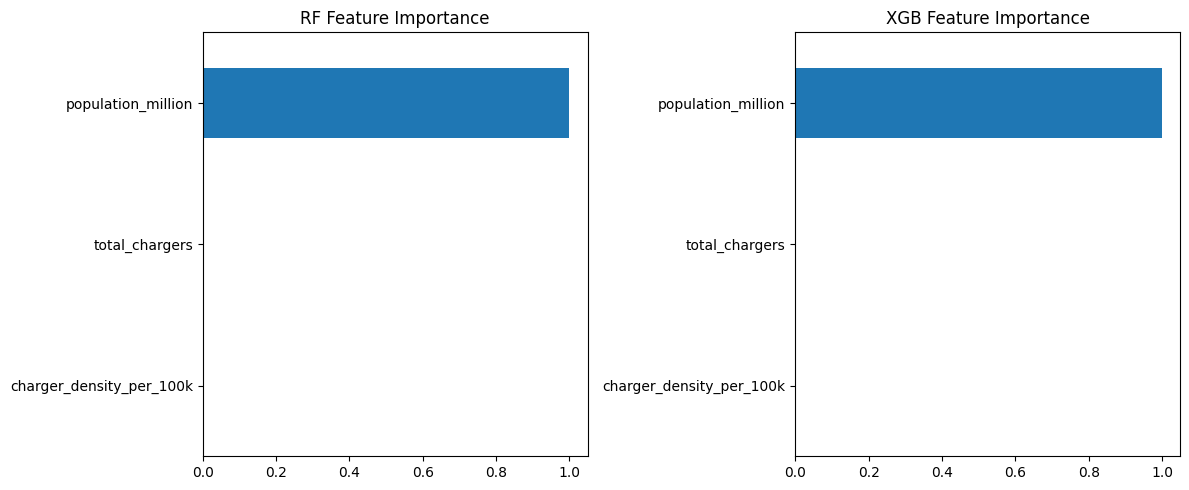

In [15]:
# Random Forest Feature Importance
importances_rf = pd.Series(rf_model.feature_importances_, index=features)

# XGBoost Feature Importance
importances_xgb = pd.Series(xgb_model.feature_importances_, index=features)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

importances_rf.sort_values().plot(kind='barh', ax=axes[0], title="RF Feature Importance")
importances_xgb.sort_values().plot(kind='barh', ax=axes[1], title="XGB Feature Importance")

plt.tight_layout()
plt.show()


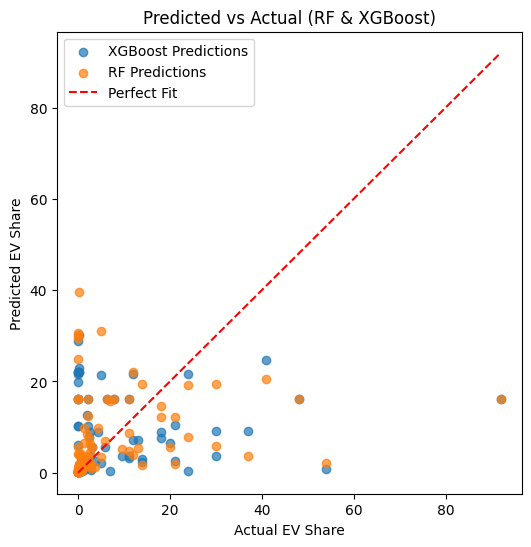

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.7, label="XGBoost Predictions")
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="RF Predictions")
plt.plot([0, max(y_test)], [0, max(y_test)], "r--", label="Perfect Fit")
plt.xlabel("Actual EV Share")
plt.ylabel("Predicted EV Share")
plt.legend()
plt.title("Predicted vs Actual (RF & XGBoost)")
plt.show()
